<a href="https://colab.research.google.com/github/kraigochieng/merge-sort-variations/blob/main/MergeSorts.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
import random
import time
from tqdm.auto import tqdm
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [7]:
def bottom_up_merge(array, left, mid, right):
    temp = []
    i = left
    j = mid + 1

    while i <= mid and j <= right:
        if array[i] < array[j]:
            temp.append(array[i])
            i += 1
        else:
            temp.append(array[j])
            j += 1

    while i <= mid:
        temp.append(array[i])
        i += 1

    while j <= right:
        temp.append(array[j])
        j += 1

    for i in range(len(temp)):
        array[left + i] = temp[i]


def bottom_up_merge_sort(array):
    n = len(array)
    size = 1

    while size < n:
        left = 0
        while left < n - 1:
            mid = min(left + size - 1, n - 1)
            right = min(left + 2 * size - 1, n - 1)
            bottom_up_merge(array, left, mid, right)
            left += 2 * size

        size *= 2

    return array



In [8]:
def top_down_merge(left, right):
    result = []
    i = j = 0

    while i < len(left) and j < len(right):
        if left[i] < right[j]:
            result.append(left[i])
            i += 1
        else:
            result.append(right[j])
            j += 1

    for k in range(i, len(left)):
        result.append(left[k])

    for k in range(j, len(right)):
        result.append(right[k])

    return result

def top_down_merge_sort(data):
    if len(data) <= 1:
        return data

    mid = len(data) // 2

    left = []
    for i in range(mid):
        left.append(data[i])

    right = []
    for i in range(mid, len(data)):
        right.append(data[i])

    left = top_down_merge_sort(left)
    right = top_down_merge_sort(right)

    return top_down_merge(left, right)





In [9]:
def test_merge(
    test_num: int,
    input_size: int
):
  results = {
      "Avg_bottom_up_time" : None,
      "Avg_top_down_time" : None,
      "Input_size" : input_size
  }

  total_bottom_up_time = 0
  total_top_down_time = 0

  for test in range(test_num):
    # 1. Create an array for both merge sorts
    array = list(range(1, input_size+1))
    bottom_up_array = array.copy()
    random.shuffle(bottom_up_array)
    top_down_array = array.copy()
    random.shuffle(top_down_array)
    # print(f"Basic Array : {bottom_up_array} \nTop-Down Array : {top_down_array}")

    # 2. Basic Merge Sort
    bottom_up_start = time.time()
    bottom_up_sorted = bottom_up_merge_sort(bottom_up_array)
    bottom_up_end = time.time()
    bottom_up_duration = bottom_up_end - bottom_up_start

    # 3. Top-Down Merge Sort
    top_down_start = time.time()
    top_down_sorted = top_down_merge_sort(top_down_array)
    top_down_end = time.time()
    top_down_duration = top_down_end - top_down_start

    # 4. Print what's happening
    print(f"Bottom-Up Sort Duration : {bottom_up_duration:.4f} || Top-Down Merge Sort Duration : {top_down_duration:.4f}")

    # 5. Update Dictionary
    total_bottom_up_time += bottom_up_duration
    total_top_down_time += top_down_duration

  results["bottom_up_time_avg"] = total_bottom_up_time / test_num
  results["Avg_top_down_time"] = total_top_down_time / test_num

  # 6. Return results
  # print(f"First 10 values: {bottom_up_sorted[:10]} || Last 10 values: {bottom_up_sorted[-10:]}")
  return results




In [10]:
def input_size_init(
    input_size: int,
    tests_per_input_size: int
):
  # 1. Input the test sizes
  sizes = [input_size, input_size * 10, input_size * 50, input_size * 100, input_size * 200]

  # 2. Initialize a dictionary to store the averages and their corresponding input_size
  new_results = {
      "bottom_up_time_avg" : [],
      "top_down_time_avg" : [],
      "input_size" : []
  }

  # 3. Get the averages per input size
  for num in tqdm(range(len(sizes))):
    print(f"Test: {num + 1} | Input Size: {sizes[num]}\n--------")
    time_results = test_merge(
        test_num = tests_per_input_size,
        input_size = sizes[num]
    )
    new_results["bottom_up_time_avg"].append(time_results["bottom_up_time_avg"])
    new_results["top_down_time_avg"].append(time_results["Avg_top_down_time"])
    new_results["input_size"].append(time_results["Input_size"])
    print("\n")

  return new_results


In [11]:
# Get time averages per input size
time_averages_per_size = input_size_init(
    input_size = 20,
    tests_per_input_size = 10
)

 60%|████████████████████████████████████████▏                          | 3/5 [00:00<00:00, 23.26it/s]

Test: 1 | Input Size: 20
--------
Bottom-Up Sort Duration : 0.0001 || Top-Down Merge Sort Duration : 0.0001
Bottom-Up Sort Duration : 0.0001 || Top-Down Merge Sort Duration : 0.0001
Bottom-Up Sort Duration : 0.0001 || Top-Down Merge Sort Duration : 0.0001
Bottom-Up Sort Duration : 0.0001 || Top-Down Merge Sort Duration : 0.0001
Bottom-Up Sort Duration : 0.0001 || Top-Down Merge Sort Duration : 0.0001
Bottom-Up Sort Duration : 0.0001 || Top-Down Merge Sort Duration : 0.0001
Bottom-Up Sort Duration : 0.0001 || Top-Down Merge Sort Duration : 0.0001
Bottom-Up Sort Duration : 0.0001 || Top-Down Merge Sort Duration : 0.0001
Bottom-Up Sort Duration : 0.0001 || Top-Down Merge Sort Duration : 0.0001
Bottom-Up Sort Duration : 0.0001 || Top-Down Merge Sort Duration : 0.0001


Test: 2 | Input Size: 200
--------
Bottom-Up Sort Duration : 0.0007 || Top-Down Merge Sort Duration : 0.0008
Bottom-Up Sort Duration : 0.0006 || Top-Down Merge Sort Duration : 0.0008
Bottom-Up Sort Duration : 0.0006 || Top-D

100%|███████████████████████████████████████████████████████████████████| 5/5 [00:00<00:00,  6.46it/s]

Bottom-Up Sort Duration : 0.0171 || Top-Down Merge Sort Duration : 0.0203
Bottom-Up Sort Duration : 0.0185 || Top-Down Merge Sort Duration : 0.0205




In [12]:
time_averages_per_size.keys()

dict_keys(['bottom_up_time_avg', 'top_down_time_avg', 'input_size'])

In [13]:
averages_df = pd.DataFrame(time_averages_per_size)
averages_df

,bottom_up_time_avg,top_down_time_avg,input_size
0,0.000067,0.000067,20
1,0.000919,0.001114,200
2,0.004099,0.004808,1000
3,0.009149,0.009798,2000
4,0.017719,0.020237,4000


In [14]:
basic_time_avg = time_averages_per_size["bottom_up_time_avg"]
length = len(basic_time_avg)
length

5

In [15]:
def plot_durations(
    results: dict[str, list[float]]
):
    """Plot the durations of Basic and Top-Down Merge Sorts"""
    # Get the values from the dictionary
    basic_time_avg = results["bottom_up_time_avg"]
    top_down_time_avg = results["top_down_time_avg"]
    input_size = results["input_size"]
    # length = range(len(basic_time_avg))

    # Set the figure size
    plt.figure(figsize=(8, 6))

    # Plot the durations
    plt.plot(input_size, basic_time_avg, label = "Bottom-Up Merge Sort Time Average", marker='o')
    plt.plot(input_size, top_down_time_avg, label = "Top-Down Merge Sort Time Average", marker='o')
    plt.title("Bottom-Up and Top-Down Merge Sorts Average Durations")
    # Label the axes
    plt.xlabel("Input Sizes")
    plt.ylabel("Average Time (in seconds)")
    plt.xlabel("Input Sizes")
    plt.legend()

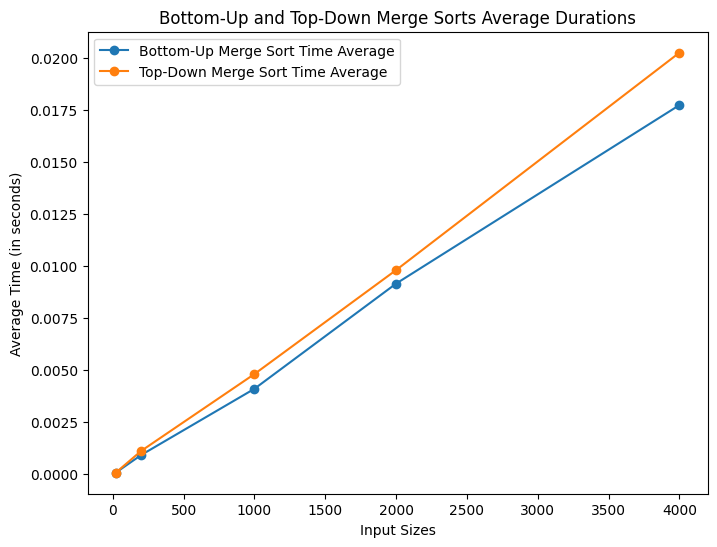

In [16]:
plot_durations(time_averages_per_size)